# QOSF - TASK 4
# Variational Quantum Eigensolver

The aim of the task is to find the lowest eigenvalue of the following unitary matrix

$$
U = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

using VQE-like circuits. In order to do so, one must find a decomposition of the unitary $U$ in terms of Pauli operators $\{\mathbb{1}, X, Y, Z\}$:

$$
\mathbb{1} =
\begin{bmatrix}
1 & 0  \\
0 & 1
\end{bmatrix}\quad
X =
\begin{bmatrix}
0 & 1 \\
1& 0
\end{bmatrix}\quad
Y =
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}\quad
z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$

in order to be implemented on a quantum computer. In particular, since we are dealing with a $4\times4$ matrix, two qubits are needed, thus the desired decomposition will be made of *tensor products* of two Pauli operators (e.g. $X_1 \otimes Y_2$, where the subscript denotes the system on which the operator acts).


### Decomposition in terms of Pauli operators

Given that:

$$
X_1\otimes X_2 = 
\begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} \otimes \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} =
\begin{bmatrix} 0 \cdot \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} & 1 \cdot \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix}\\ 1 \cdot \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} & 0 \cdot \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} 0 &  0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \end{bmatrix}
$$

$$
Y_1\otimes Y_2 = 
\begin{bmatrix} 0 & -i\\ i & 0 \end{bmatrix} \otimes \begin{bmatrix} 0 & -i\\ i & 0 \end{bmatrix} = \begin{bmatrix} 0 &  0 & 0 & -1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ -1 & 0 & 0 & 0 \end{bmatrix}
$$

$$
Z_1\otimes Z_2 = 
\begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix} \otimes \begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 1 &  0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$$

$$
\mathbb{1}_{4\times4} = \begin{bmatrix} 1 &  0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$$

by inspection, it can be seen that 

$$
U = \frac{1}{2}(I_1\otimes I_2+Z_1\otimes Z_2)-\frac{1}{2}(X_1 \otimes X_2+Y_1\otimes Y_2)
$$

that is, we found the desired decomposition of matrix $U$ in terms of Pauli operators. Since in VQE algorithms one usually deals with the minimization of the energy of a system, from now on we call the unitary matrix *Hamiltonian* $\mathcal{H} = U$ of the system, and *energy* its mean value when evaluated on a given state $|\psi(\theta)\rangle$, that is $E(\theta) = \langle \mathcal{H} \rangle_{\theta}=\langle \psi(\theta) | \mathcal{H}|\psi(\theta)\rangle$.  

Notice that if $|\psi(\theta)\rangle$ is an *eigenvector* of the unitary $\mathcal{H}$, it has an energy $E(\theta)$ being the corresponding *eigenvalue*. Our task is then to find the lowest eigenvalue of $\mathcal{H}$, by minimizing $\langle \mathcal{H}\rangle \rightarrow \langle\mathcal{H}\rangle_{|\psi(\theta_{min})\rangle}$.\
The difficcult part is to find a trial state that can be well parametrized (we cannot assure that we can actually reach, by modyfing $\theta$, the eigenvector with the lowest corresponding eigenvalue).


### Variational Quantum Eigensolver

The idea behind VQE, is to use a quantum computer to evaluate the mean value of the *Hamiltonian* on a trial state $|\psi(\theta)\rangle$ parametrized by $\theta$, and then slowly change this parameter in order to find lower and lower values for the energy $E(\theta)$.  

Given that $\langle \mathbb{1} \rangle = 1$, it holds that (from now on we omit the $\otimes$ symbol for readibility)

$$
\langle \mathcal{H} \rangle = \frac{1}{2}(1 + \langle Z_1 Z_2\rangle)-\frac{1}{2}(\langle X_1 X_2\rangle+\langle Y_1 Y_2\rangle) \\
$$  


which means we have to use some quantum circuits to estimate the mean value of the operators $X_1 X_2,\ Y_1 Y_2,\ Z_1 Z_2$, and then combine them back together to find the eigenvalue $E = \langle \mathcal{H} \rangle $.  

Measurements in quantum computers generally happens along the $Z$ basis (known as *computational basis*), which means that we can only measure eigevectors and eigenvalues of $Z$. In order to measure other different observables, we need to change basis, and this can be done introducing some gate before the measurement happens. 

### Change of basis

Noticing that:
$$
X=HZH\quad Y=(HS^\dagger)^\dagger Z(HS^\dagger)
$$
we can measure along the X basis by introducing an Hadamard $H$ gate before the measurement. Same happens with $Y$, by using a combination of Hadamard and Phase gates $HS^\dagger$.  

However, in our case we wish to measure two-qubits observables. 



#### Observable $Z_1 Z_2$
  
The operator $Z_1 Z_2$ acts like: 
$$
Z_1 Z_2|00\rangle = +1 |00\rangle \\
Z_1 Z_2|11\rangle = +1 |11\rangle \\
Z_1 Z_2|01\rangle = -1 |01\rangle \\
Z_1 Z_2|10\rangle = -1 |10\rangle \\
$$
that is, it checks whether the two qubits are in the same state (both $0$ or both $1$), in which case it has eigenvalue $1$, otherwise it has eigenvalue $-1$. A similar action can be implemented using a CNOT, in fact this gates loads on the second qubit the binary sum of the two qubits $\text{CNOT}|q_1\rangle|q_2\rangle=|q_1\rangle|q_1\oplus q_2\rangle$.  
Note that we can obtain the same numerical results (eigenvalues), but the final states are different using CNOT in comparison to $Z_1Z_2$.   
Infact, if
* $q_1 = q_2$ (qubits are in the same state), it holds that $|q_1\oplus q_2\rangle = |0\rangle$ and a measurement of the second qubit in the computational basis ($Z$ basis) would yield result $+1$, 
* $q_1\neq q_2$, then $|q_1\oplus q_2\rangle=|1\rangle$ and a measurement would yield result $-1$, as desired.

> Remember that, given a general qubit state $|\psi\rangle=\alpha |0\rangle + \beta |1\rangle$, it holds $\langle Z \rangle = \langle \psi | Z | \psi \rangle = |\alpha|^2-|\beta|^2$.

In this way, we can measure the observable $Z_1 Z_2$ by introducing a CNOT gate and then just measuring the second qubit in the usual $Z$ basis. By measuring the second qubit (checking whether it is in a $|0\rangle$ or $|1\rangle$ state) we directly make a biyection onto $Z_1Z_2$ measurements +1 or -1, respectively. It is reported in the following circuit:

Measurement in the ZZ basis


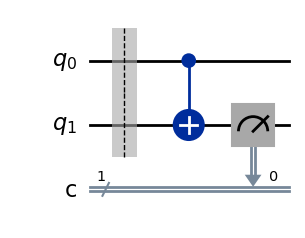

In [1]:
import qiskit as qk
import numpy as np

qc = qk.QuantumCircuit(2,1)
qc.barrier()
qc.cx(0,1)
qc.measure(1,0) #qubit 1 to cbit 0
print("Measurement in the ZZ basis")
# qc.draw(output="mpl",style="clifford")
qc.draw(output="mpl")



Other two-qubit observables can be reducted to a measurement of $Z_1 Z_2$ by means of appropriate unitary transformations (change of basis).

#### Observable $X_1 X_2$

Using $X=HZH$ and the CNOT for measuring $Z_1 Z_2$, we have that the measurement in the $X_1 X_2$ can be achieved using the following circuit:

Measurement in the XX basis


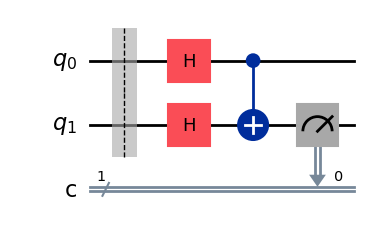

In [2]:
qc = qk.QuantumCircuit(2,1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure(1,0)
print("Measurement in the XX basis")
qc.draw(output="mpl")

#### Observable $Y_1 Y_2$

Using $Y=(HS^\dagger)^\dagger Z(HS^\dagger)$ and the CNOT for measuring $Z_1 Z_2$, we have that the measurement in the $Y_1 Y_2$ can be achieved using the following circuit:

Measurement in the YY basis


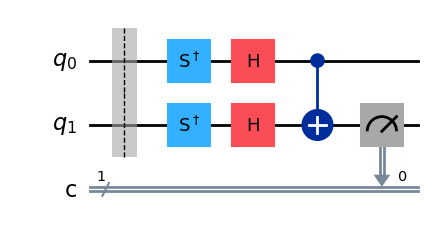

In [3]:
qc = qk.QuantumCircuit(2,1)
qc.barrier()
qc.sdg(0)
qc.sdg(1)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure(1,0)
print("Measurement in the YY basis")
qc.draw(output="mpl")

## VQE

We now proceed implementing the VQE architecure, which works as follows:
* choose an ansatz for a trial state $|\psi(\theta)\rangle$, parametrized by the parameter $\theta$
* use three different quantum circuits to estimate the mean values $\langle X_1 X_2 \rangle_\theta$, $\langle Y_1 Y_2 \rangle_\theta$ and $\langle Z_1 Z_2 \rangle_\theta$ on the same trial circuit, where the subscript indicate the dependece on $\theta$. 
* compute the energy $E(\theta)=\langle \mathcal{H} \rangle_\theta$
* change $\theta$ in order to reach a lower energy

As suggested, we use the ansatz $|\psi(\theta)\rangle = [(RX(\theta)_1\otimes \mathbb{1}_2) \ \text{CNOT}\ (H_1\otimes \mathbb{1}_2)]|00\rangle$.

The quantum circuits are built with **Qiskit**.

Ansatz initial state, with theta as parameter (eg: +1.57079633)


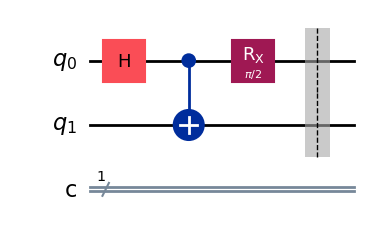

In [4]:
qc = qk.QuantumCircuit(2,1)
theta = np.pi/2
qc.h(0)             # hadamard
qc.cx(0,1)          # CNOT
qc.rx(theta, 0)     # rotation in x axis
qc.barrier()
print(f"Ansatz initial state, with theta as parameter (eg: {theta:+10.8f})")
qc.draw(output="mpl")

###### Importation of packages

In [5]:
import qiskit_aer
import numpy as np
from scipy.optimize import minimize_scalar, minimize
from numpy import pi

sim_bknd = qiskit_aer.Aer.get_backend('qasm_simulator')

###### Functions declaration

In [ ]:
def ansatz(qc, qr, theta):
    """
    Builds the trial state using the ansatz: (RX I) CX (H I)|00>
    
    Arguments
    -----------
    qc: is a QuantumCircuit object from Qiskit
    qr: is a QuantumRegister object used in the quantum circuit qc
    theta (real): is the parameter parametrizing the trial state
    
    Return
    ---------
    qc: returns the input quantum circuit added with the gates creating the trial state
    
    """
    
    #REMEMBER 
    qc.h(qr[0])         # hadamard  
    qc.cx(qr[0],qr[1])  # CNOT
    qc.rx(theta, qr[0]) # rotation in x axis
    
    return qc

def measurements(qc, qr, cr, op):
    """
    Implements the quantum measurements in different basis: XX, YY and ZZ.
    
    Arguments
    -----------
    qc: is a QuantumCircuit object from Qiskit
    qr: is a QuantumRegister object used in the quantum circuit qc
    cr: is a ClassicalRegister object used in the quantum circuit qc
    op (str): is a string with possible values: XX, YY and ZZ.
    
    
    Return
    ---------
    qc: returns the input quantum circuit added with the appropriate gates to measure in the selected basis.
    
    """
    
    if op == "XX":
        # Change of basis, since X = HZH
        qc.h(qr[0])
        qc.h(qr[1])
        
        # CNOT used to measure ZZ operator
        qc.cx(qr[0],qr[1])
        
        # Measurement of qubit 1 on classical register 0
        qc.measure(qr[1],cr[0])     
        
    elif op == "YY":
        # Change of basis, since Y = (HS†)Z(HS†)
        qc.sdg(qr[0])
        qc.sdg(qr[1])
        qc.h(qr[0])
        qc.h(qr[1])
        
        # CNOT used to measure ZZ operator
        qc.cx(qr[0],qr[1])
        
        # Measurement of qubit 1 on classical register 0
        qc.measure(qr[1],cr[0])
        
    elif op == "ZZ":
        # CNOT used to measure ZZ operator
        qc.cx(qr[0],qr[1])
        
        # Measurement of qubit 1 on classical register 0
        qc.measure(qr[1],cr[0])
    
    else:
        print(f"WARNING: Measurement on the {op} basis not supported")
        return 
        
    return qc

def hamiltonian(params):
    """
    Evaulates the Energy of the trial state using the mean values of the operators XX, YY and ZZ.
    
    Arguments
    -----------
    params (dict): is an dictionary containing the mean values form the measurements of the operators XX, YY, ZZ;
    
    Return
    ---------
    en (real): energy of the system
    
    """
    # We apply the hamiltonian to get the mean energy
    # H = 1/2 * (Id + ZZ - XX - YY)
    en = (1 + params['ZZ'] - params['XX'] - params['YY']) / 2
    return en

def vqe_step(theta, verbose = True):
    """
    Executes the VQE algorithm. 
    Creates and executes three quantum circuits (one for each of the observables XX, YY and ZZ), then evaluates the energy.
    
    Arguments
    -----------
    theta (real): is the parameter parametrizing the trial state
    
    Return
    --------
    energy (real): the energy of the system
    qc_list (dict): a dictionary containing the three quantum circuits for the observables XX, YY and ZZ
    
    """
    # Number of executions for each quantum circuit
    shots=10000
    
    vqe_res = dict()    #vqe_res = {"XX","YY","ZZ"} stores the mean values of the measurements
    qc_list = dict()    #vqe_res = {"XX","YY","ZZ"} stores the measured quantum circuits
    
    for op in ["XX", "YY", "ZZ"]:
        #Same process for each basis
        qr = qk.QuantumRegister(2, "qr")    # 2-qubit system
        cr = qk.ClassicalRegister(1, "cr")  # 1-classical bit system for measurement
        qc = qk.QuantumCircuit(qr, cr)      # start of the quantum circuit connected to the classical

        # Implementation of the ansatz
        qc = ansatz(qc, qr, theta)

        # Just for plotting purposes
        qc.barrier()

        # Measurements in the appropriate basis (XX, YY, ZZ) are implemented
        qc = measurements(qc, qr, cr, op)
                
        # Get the measurements results
        qc_t = qk.transpile(qc, sim_bknd)           # 1. Transpile the circuit for the backend
        job = sim_bknd.run(qc_t, shots=shots)       # 2. Run it
        counts = job.result().get_counts()          # 3. Get results   
        
        #Warning! its ordered by descending order of counts
        #counts['0'] is the number of Zeros obtained
        #counts['1'] is the number of Ones obtained
        
        
        # Check the results, and evaluate the mean value dividing by the number of shots
        if len(counts) == 1:    #case of "XX"       
            try:                #check whether there are only counts['0'] or counts['1']
                counts['0']     
                mean_val = 1
            except:             #executed if code in "try:" doesn't work (there are only counts[1])
                mean_val = -1 
        else:
            # Evaluates the mean value of Z operator, as the difference in the number of 
            # 0s and 1s in the measurement (of classical bit) outcomes.

            # 0 measurement (in the classical bit) corresponds to an eigenvalue +1 of the qubit
            # 1 measurement (in the classical bit) corresponds to an eigenvalue -1 of the qubit
            mean_val = (counts['0']-counts['1'])/shots      #values for "YY" and "ZZ"
            
        vqe_res[op] = mean_val  #vqe_res = {"XX","YY","ZZ"} stores the mean values
        qc_list[op] = qc        #vqe_res = {"XX","YY","ZZ"} stores the measured quantum circuits
        
    energy = hamiltonian(vqe_res)
    
    if verbose: 
        print("Mean values from measurement results:\n", vqe_res) 
        print(f"\n{'Theta':<10} {'Energy':<10} {'<XX>':<10} {'<YY>':<10} {'<ZZ>':<10}")
        print(f"{theta:<10f} {energy:<10f} {vqe_res['XX']:<10f} {vqe_res['YY']:<10f} {vqe_res['ZZ']:<10f}")
    
        return energy, qc_list
    
    else: 
        return energy

Let's try if it all works properly:

Mean values from measurement results:
 {'XX': 1, 'YY': -0.6166, 'ZZ': 0.6254}

Theta      Energy     <XX>       <YY>       <ZZ>      
0.900000   0.621000   1.000000   -0.616600  0.625400  

 Example of the quantum circuit for the measurement of YY


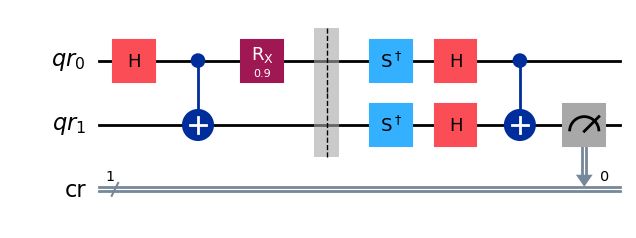

In [7]:
# Set the value of theta
theta = 0.9

# Run the VQE step to evaluate the energy (eigenvalue of the Hamiltonian) of the state with given theta
energy, qc_list = vqe_step(theta)

# Plot the circuit used for the measurement of YY
op_example = 'YY'
print(f"\n Example of the quantum circuit for the measurement of {op_example}")
qc_list[op_example].draw(output="mpl")

We see that for $\theta=0.2$, the energy $E(0.2)=\langle\mathcal{H}\rangle_{0.2} \sim 0.98$. Our aim is to find a value for the parameter that yields the lowest possible energy, and that is the desired lowest eigenvalue for the Task.  
The minimization procedure can be done by hand, or by setting up an optimizator. 

##### Using an optimizator

In [8]:
# for shots = 10000 it takes ~20 seconds
minimize_scalar(vqe_step, args=(False), bounds = (0, pi), method = "bounded")

 message: Solution found.
 success: True
  status: 0
     fun: -1.0
       x: 3.1233831179745155
     nit: 23
    nfev: 23

##### Conclusion
We see that the optimizator succeds in finding a solution. In particular, the optimal value seems to be $\theta \sim \pi$, and its energy is close to minus unity. 
We can then check this result directly feeding $\theta = \pi$ to the `vqe_step` function:

In [9]:
lowest, _ = vqe_step(3.14)

Mean values from measurement results:
 {'XX': 1, 'YY': 1, 'ZZ': -1}

Theta      Energy     <XX>       <YY>       <ZZ>      
3.140000   -1.000000  1.000000   1.000000   -1.000000 


And we can actually see that our desired result is indeed given by:

$$
\langle \mathcal{H} \rangle_{\theta = \pi} = \frac{1}{2}(1 + \langle Z Z\rangle)-\frac{1}{2}(\langle X X\rangle+\langle Y Y\rangle) \\
 = -1
$$  

with $\langle XX \rangle = 1$, $\langle YY \rangle = 1$, $\langle ZZ \rangle = -1$.  

**Thus, we found the solution to the Task, that is the lowest eigenvalue of $\mathcal{H}$ (formerly $U$), which amounts to $-1$.**

###### Final (classical) check
As a final step, we can check the result of our calculation with Scipy's eigensolver.

In [10]:
# Definition of one qubit Pauli matrices
I = np.array([[1,0],[0,1]])
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])

# Evaluation of two qubit Pauli matrices
II = np.kron(I,I)
XX = np.kron(X,X)
YY = np.kron(Y,Y)
ZZ = np.kron(Z,Z)

# Calculation of the Hamiltonian
H = (1/2) * (II+ZZ) - (1/2) * (XX+YY)

print("Desired Hamiltionian H = \n", H)

Desired Hamiltionian H = 
 [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


Which is the same as $U$. Now we proceed calculating the eigenvalues:

In [11]:
import scipy

# Calculate eigenvalues and eigenvectors of H
eigenvalues, eigenvectors = scipy.linalg.eig(H)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [ 1.+0.j -1.+0.j  1.+0.j  1.+0.j]


We see that $-1$ is actually the lowest eigenvalue, as we found with VQE.